In [54]:
import numpy as np
import matplotlib.pyplot as plt

from torch_dataset import MoleculesDataset
from data_gen import get_data
import torch
import os

from mpl_toolkits import mplot3d

In [46]:
data_dir = "test"
xyz_paths = [f"{data_dir}/{name}" for name in os.listdir(data_dir)]
xyz_paths = xyz_paths[:10]

Original coordinates: 
[[ 0.02846164  1.47581244  0.09152712]
 [-0.12036145  0.04014928 -0.13960735]
 [ 0.68406761 -0.49594539 -1.21832478]
 [ 2.26327014 -0.5073393  -1.14660811]
 [ 2.24467325 -1.9599359  -1.69474041]
 [ 3.21455646 -2.97567177 -1.1133877 ]
 [ 0.74438787 -2.05327821 -1.3044908 ]
 [ 0.23866066  0.08385231 -2.4935503 ]
 [-0.08274511  0.53709042 -3.50731635]
 [ 1.06477726  1.79655373  0.28900787]
 [-0.33332327  2.02403569 -0.78345191]
 [-0.58940274  1.76313305  0.94608879]
 [ 0.10002515 -0.47377202  0.70646679]
 [ 2.8103919   0.25229037 -1.70725596]
 [ 2.57375479 -0.47548795 -0.09650857]
 [ 2.33641934 -1.93885112 -2.78541684]
 [ 3.1406846  -3.01128173 -0.02026609]
 [ 3.0109055  -3.98226428 -1.49469423]
 [ 4.2501049  -2.72689795 -1.36949778]
 [ 0.61437619 -2.4752872  -0.30178618]
 [ 0.04995098 -2.54444408 -1.98730433]]


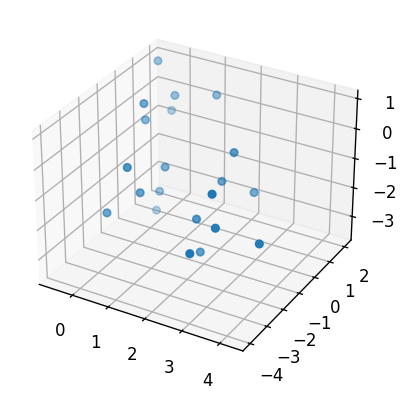

In [134]:
fig = plt.figure(dpi=120)
ax = fig.add_subplot(111, projection="3d")
molecule = get_data(xyz_paths[2])
mol_coord = molecule[2][..., 1:]
print(f"Original coordinates: \n{mol_coord}")
# molecule plot
ax.scatter(mol_coord[:, 0], mol_coord[:, 1], mol_coord[:, 2])
plt.show()

In [124]:
train_dataset = MoleculesDataset(xyz_paths, n_points=16, use_numba=False, gamma=0.36)

Pool selezionato... 
In attesa di 'map'...
Pool map eseguito
Durata: 0:00:00.052417


In [ ]:
x = np.linspace(0, 7.75, 8, endpoint=False)
y = np.linspace(0, 7.75, 8, endpoint=False)
z = np.linspace(0, 7.75, 8, endpoint=False)

xx, yy = np.meshgrid(x, y)
xx, yy = xx - x.max() / 2, yy - y.max() / 2


for h_plan in range(train_dataset.dataset[0][0][0,0,:].shape[-1]):
    fig = plt.figure(dpi=120)
    ax = plt.axes(projection='3d')
    ax.contour3D(xx, yy, train_dataset.dataset[1][0][:,:,h_plan].squeeze())
    plt.title(f"z_plan {h_plan*(7.75/8)}")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()

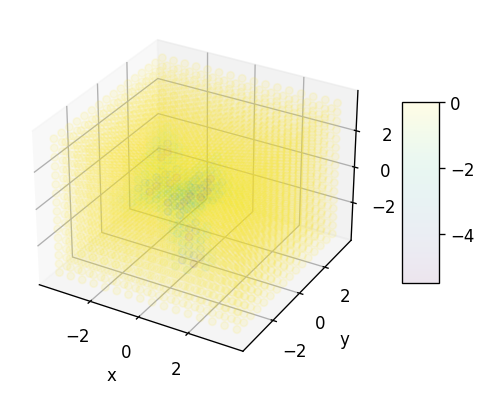

In [135]:
from matplotlib.colors import ListedColormap

x = np.linspace(0, 7.75, 16, endpoint=False)
y = np.linspace(0, 7.75, 16, endpoint=False)
z = np.linspace(0, 7.75, 16, endpoint=False)

xx, yy, zz = np.meshgrid(x, y, z)
xx, yy, zz = xx - x.max() / 2, yy - y.max() / 2, zz - z.max() / 2


fig = plt.figure(dpi=120)
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(xx, yy, zz, c=-train_dataset.dataset[2][0].squeeze(), alpha=0.1)
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
# plt.title(f"z_plan {h_plan*(7.75/8)}")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [91]:
import plotly.express as px


In [97]:
fig = px.scatter_3d(train_dataset.dataset[1][0].squeeze())
fig.show()

ValueError: only one element tensors can be converted to Python scalars